In [11]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
cardio_df = pd.read_csv("File Address")
cardio_df.head()

,Age,Gender,CP,RestBP,Chol,FBS,RestECG,MaxPR,ExcAngina,ST,STSlope,MajVes,thall,Output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
cardio_df.dtypes

Age            int64
Gender         int64
CP             int64
RestBP         int64
Chol           int64
FBS            int64
RestECG        int64
MaxPR          int64
ExcAngina      int64
ST           float64
STSlope        int64
MajVes         int64
thall          int64
Output         int64
dtype: object

In [28]:
# determining x and y and converting into np.array
x = np.asarray(cardio_df[["Age", "Gender", "CP", "RestBP", "Chol", "FBS", "RestECG", "MaxPR", "ExcAngina", "ST", "STSlope", "MajVes", "thall"]])
y = np.asarray(cardio_df["Output"])

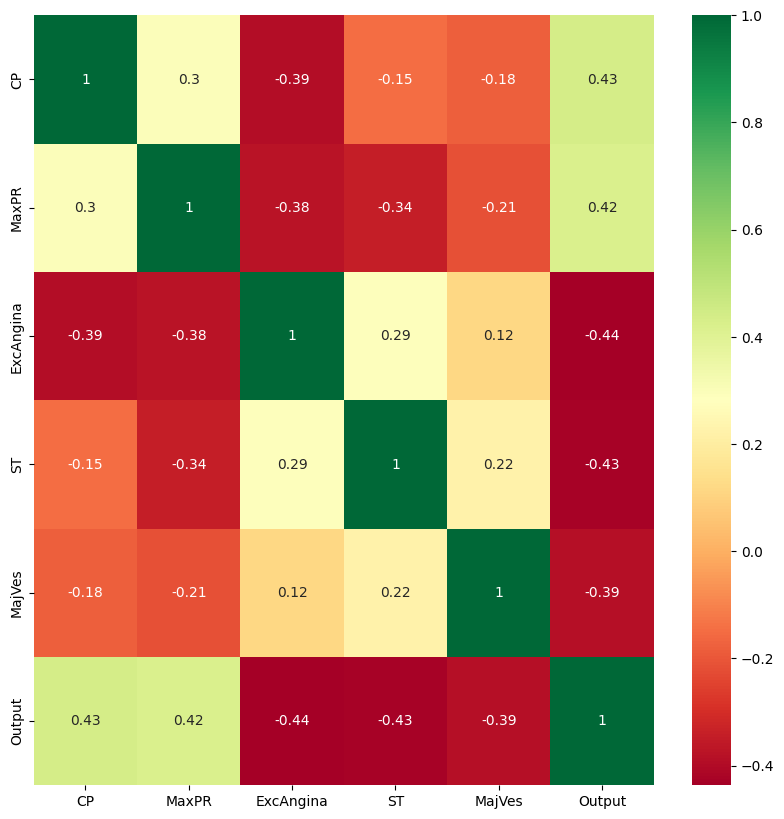

In [29]:
# creating heatmap
import seaborn as sns
corrmat = cardio_df.corr()
top_corr_features = corrmat.index[abs(corrmat["Output"])>0.35]
plt.figure(figsize=(10,10))
g = sns.heatmap(cardio_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### KNN

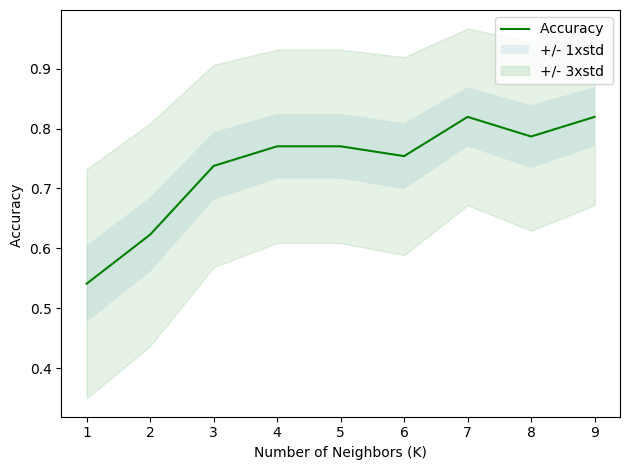

The best accuracy was with 0.819672131147541 with k= 7
[[30  6]
 [ 5 20]]
Confusion matrix, without normalization
[[30  6]
 [ 5 20]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.86      0.83      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.82      0.82      0.82        61



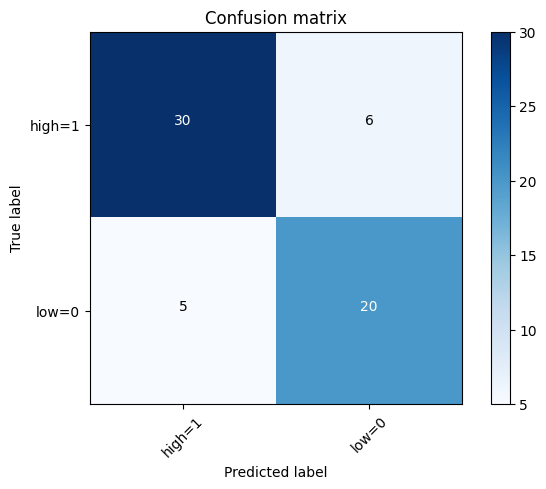

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x = np.asarray(cardio_df[["CP", "MaxPR", "ExcAngina"]])
y = np.asarray(cardio_df["Output"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
x = preprocessing.StandardScaler().fit(x).transform(x)

Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test) / np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools

neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(x_train,y_train)
y_hat=neigh.predict(x_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high=1','low=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, y_hat))

### Decision Tree

accuracy: 0.8688524590163934
[[36  0]
 [ 8 17]]
Confusion matrix, without normalization
[[36  0]
 [ 8 17]]
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        25
           1       0.82      1.00      0.90        36

    accuracy                           0.87        61
   macro avg       0.91      0.84      0.85        61
weighted avg       0.89      0.87      0.86        61



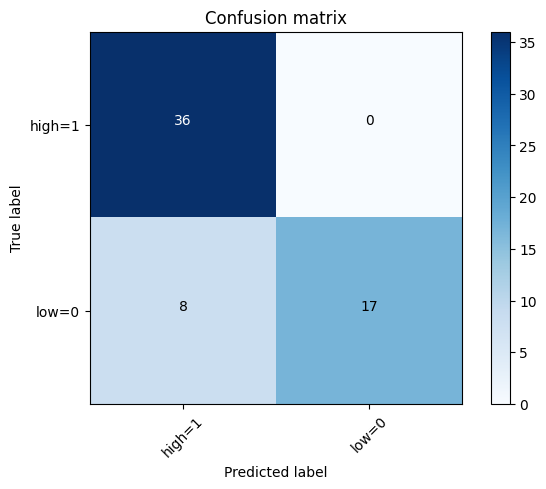

In [32]:
from sklearn.tree import DecisionTreeClassifier

x = np.asarray(cardio_df[["CP", "MaxPR", "ExcAngina", "MajVes"]])
y = np.asarray(cardio_df["Output"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
x = preprocessing.StandardScaler().fit(x).transform(x)

drugtree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
drugtree.fit(x_train, y_train)
predtree = drugtree.predict(x_test)

# evaluation

# accuracey
from sklearn import metrics
import matplotlib.pyplot as plt
print("accuracy:", metrics.accuracy_score(y_test, predtree))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, predtree, labels=[1,0]))

cnf_matrix = confusion_matrix(y_test, predtree, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high=1','low=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, predtree))

### Logistic Regression

C:\File Address\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


jaccard:  0.6923076923076923
[[35  1]
 [ 7 18]]
Confusion matrix, without normalization
[[35  1]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82        25
           1       0.83      0.97      0.90        36

    accuracy                           0.87        61
   macro avg       0.89      0.85      0.86        61
weighted avg       0.88      0.87      0.86        61

log loss:  0.5108170823962719


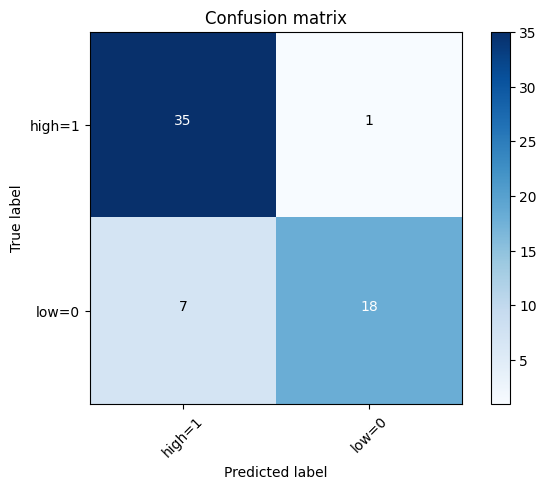

In [33]:
from sklearn.linear_model import LogisticRegression

x = np.asarray(cardio_df[["CP", "MaxPR", "ExcAngina", "thall", "MajVes"]])
y = np.asarray(cardio_df["Output"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
x = preprocessing.StandardScaler().fit(x).transform(x)

LR = LogisticRegression(C=0.02, solver="sag").fit(x_train, y_train)
y_hat = LR.predict(x_test)
y_prob = LR.predict_proba(x_test)

# evaluation 

# jaccard
from sklearn.metrics import jaccard_score
print("jaccard: ", jaccard_score(y_test, y_hat, pos_label=0))

# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high=1','low=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, y_hat))

#log loss
from sklearn.metrics import log_loss
print("log loss: ", log_loss(y_test, y_prob))

### SVM

[[34  2]
 [ 3 22]]
Confusion matrix, without normalization
[[34  2]
 [ 3 22]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

f1 scoe:  0.9177578060193311
jaccard score:  0.8148148148148148


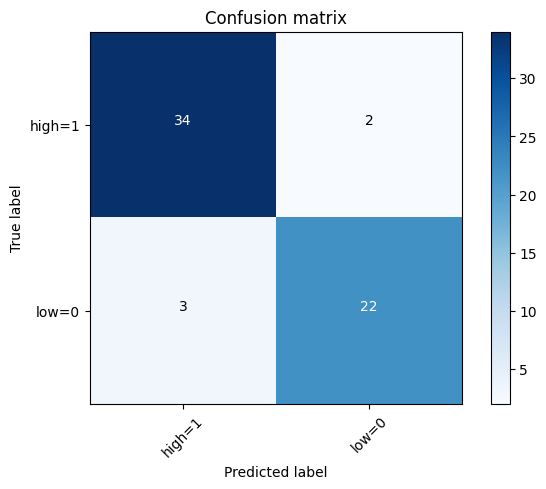

In [34]:
from sklearn import svm

x = np.asarray(cardio_df[["Age", "Gender", "CP", "RestBP", "Chol", "FBS", "RestECG", "MaxPR", "ExcAngina", "ST", "STSlope", "MajVes", "thall"]])
y = np.asarray(cardio_df["Output"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
x = preprocessing.StandardScaler().fit(x).transform(x)

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train) 

y_hat = clf.predict(x_test)

# evaluaation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high=1','low=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, y_hat))

# f1 score
from sklearn.metrics import f1_score
print("f1 scoe: ", f1_score(y_test, y_hat, average='weighted')) 

# jaccard
from sklearn.metrics import jaccard_score
print("jaccard score: ", jaccard_score(y_test, y_hat,pos_label=0))